# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [38]:
#Load data
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [39]:
# Tampilkan 5 baris pertama dengan function head.
print("=== 5 Baris Pertama Dataset ===")
df.head()

=== 5 Baris Pertama Dataset ===


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [40]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
print("\n=== Informasi Dataset ===")
df.info()


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 1

In [41]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
print("\n=== Statistik Deskriptif Dataset ===")
df.describe()


=== Statistik Deskriptif Dataset ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

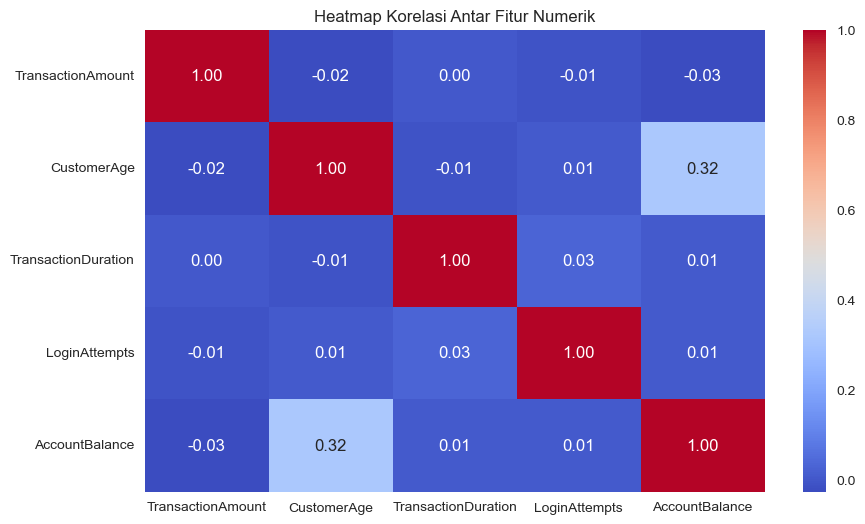

In [42]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

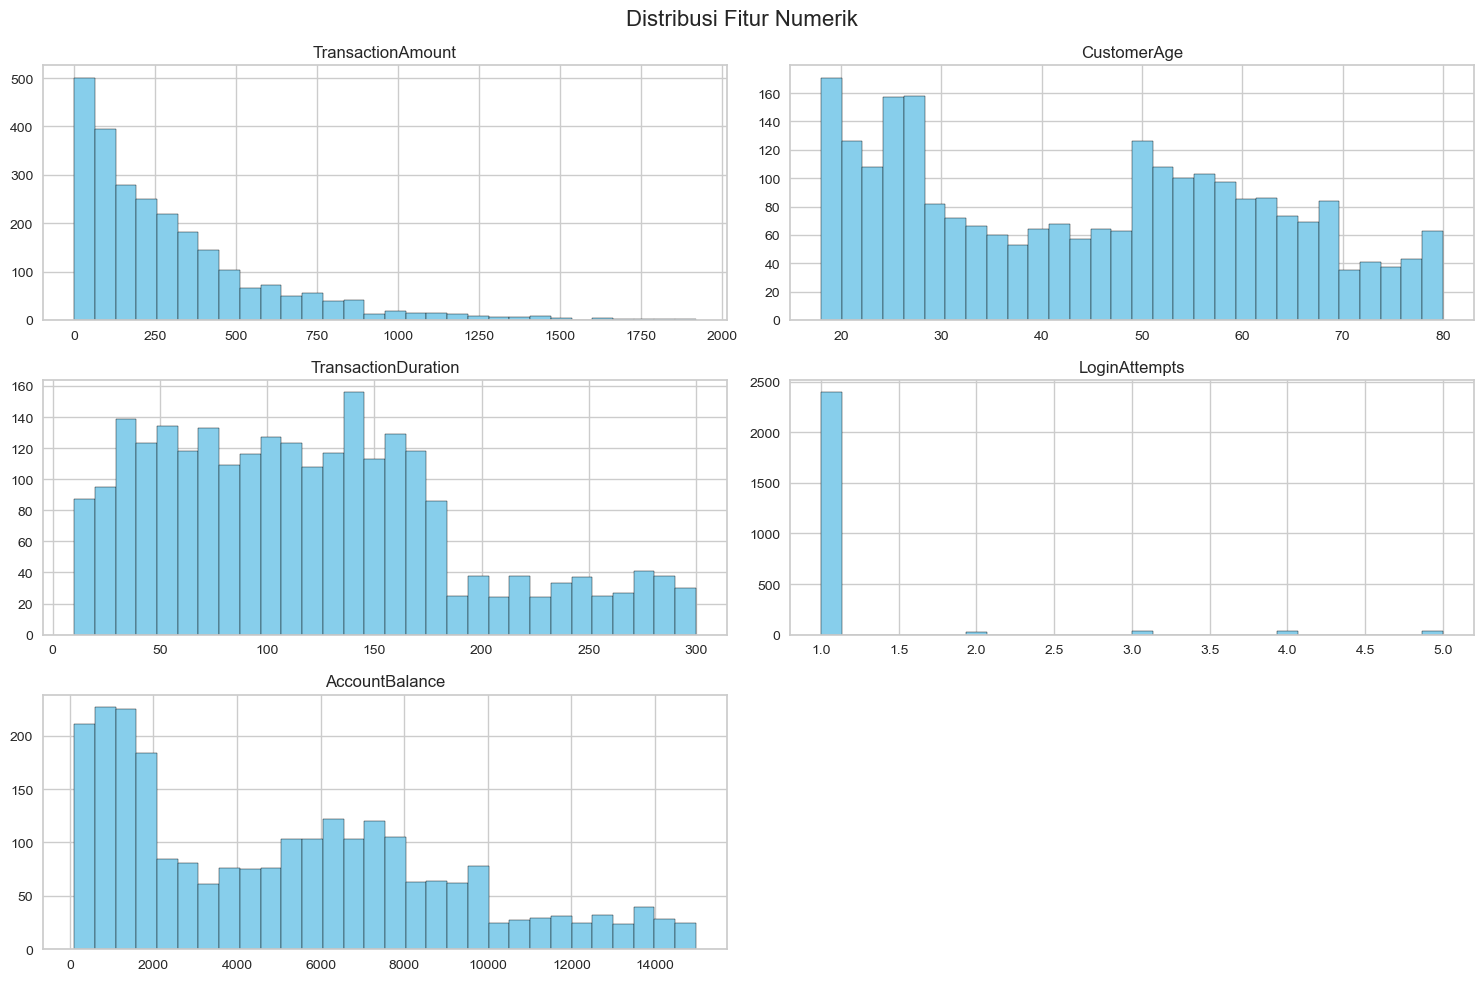

In [43]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.select_dtypes(include='number').hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

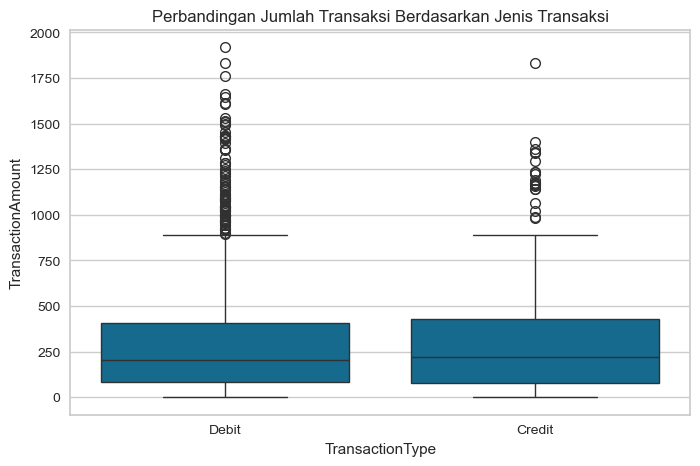

In [44]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='TransactionType', y='TransactionAmount')
plt.title('Perbandingan Jumlah Transaksi Berdasarkan Jenis Transaksi')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [45]:
# Mengecek dataset menggunakan isnull().sum()
print("=== Jumlah Nilai Kosong per Kolom ===")
print(df.isnull().sum())

=== Jumlah Nilai Kosong per Kolom ===
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [46]:
# Mengecek dataset menggunakan duplicated().sum()
print("\n=== Jumlah Baris Duplikat ===")
print(df.duplicated().sum())


=== Jumlah Baris Duplikat ===
21


In [47]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numeric_cols = df.select_dtypes(include='number').columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\n=== Data Setelah Scaling (MinMaxScaler) ===")
print(df[numeric_cols].head())


=== Data Setelah Scaling (MinMaxScaler) ===
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.007207     0.838710             0.244828            0.0   
1           0.195940     0.806452             0.451724            0.0   
2           0.065680     0.016129             0.158621            0.0   
3           0.096016     0.129032             0.051724            0.0   
4           0.006874          NaN             0.648276            0.0   

   AccountBalance  
0        0.336832  
1        0.918055  
2        0.068637  
3        0.569198  
4        0.492591  


In [48]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
kolom_drop = ['TransactionID','AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df.drop(columns=[col for col in kolom_drop if col in df.columns], inplace=True)

print("\n=== Kolom Setelah Drop Kolom ID & IP ===")
print(df.columns)


=== Kolom Setelah Drop Kolom ID & IP ===
Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


In [49]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))
print("\n=== Data Setelah Encoding ===")
print(df[categorical_cols].head())


=== Data Setelah Encoding ===
   TransactionDate  TransactionType  Location  Channel  CustomerOccupation  \
0              680                1        36        0                   0   
1             1178                1        15        0                   0   
2             1262                1        23        2                   3   
3              818                1        33        2                   3   
4             1939                0         1        2                   3   

   PreviousTransactionDate  
0                      105  
1                      192  
2                       41  
3                      163  
4                       16  


In [50]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()
print("=== Daftar Semua Kolom ===")
print(df.columns.tolist())

=== Daftar Semua Kolom ===
['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [51]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df.dropna(inplace=True)

In [52]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)
print("\n=== Data Setelah Menghapus Duplikat dan Nilai Kosong ===")


=== Data Setelah Menghapus Duplikat dan Nilai Kosong ===


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [53]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [54]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

def bin_and_encode_features(df):
    df_new = df.copy()
    le = LabelEncoder()
    
    # 1. Binning dan encoding untuk CustomerAge
    df_new['CustomerAge_bin'] = pd.cut(df_new['CustomerAge'], 
                                       bins=[0, 25, 50, 100], 
                                       labels=['Muda', 'Dewasa', 'Tua'])
    df_new['CustomerAge_bin_encoded'] = le.fit_transform(df_new['CustomerAge_bin'])

    # 2. Binning dan encoding untuk TransactionAmount
    df_new['TransactionAmount_bin'] = pd.cut(df_new['TransactionAmount'], 
                                             bins=[0, 100, 500, 10000], 
                                             labels=['Kecil', 'Sedang', 'Besar'])
    df_new['TransactionAmount_bin_encoded'] = le.fit_transform(df_new['TransactionAmount_bin'])

    # 3. Binning dan encoding untuk TransactionDuration
    df_new['TransactionDuration_bin'] = pd.cut(df_new['TransactionDuration'], 
                                               bins=[0, 10, 60, 300], 
                                               labels=['Cepat', 'Sedang', 'Lama'])
    df_new['TransactionDuration_bin_encoded'] = le.fit_transform(df_new['TransactionDuration_bin'])

    return df_new

df = bin_and_encode_features(df)


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [55]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_preprocessed = df.copy()
df_preprocessed = pd.get_dummies(df_preprocessed, drop_first=True)
scaler = MinMaxScaler()
df_preprocessed = pd.DataFrame(scaler.fit_transform(df_preprocessed), columns=df_preprocessed.columns)
df_preprocessed.describe()
print(df_preprocessed.shape)
print(df_preprocessed.head())

(2398, 20)
   TransactionAmount  TransactionDate  TransactionType  Location   Channel  \
0           0.007207         0.273642              0.5  0.837209  0.000000   
1           0.195940         0.474044              0.5  0.348837  0.000000   
2           0.065680         0.507847              0.5  0.534884  0.666667   
3           0.096016         0.329175              0.5  0.767442  0.666667   
4           0.047888         0.255533              0.5  0.651163  0.000000   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710                0.00             0.244828            0.0   
1     0.806452                0.00             0.451724            0.0   
2     0.016129                0.75             0.158621            0.0   
3     0.129032                0.75             0.051724            0.0   
4     0.000000                0.75             0.558621            0.0   

   AccountBalance  PreviousTransactionDate  CustomerAge_bin_encoded  \
0   

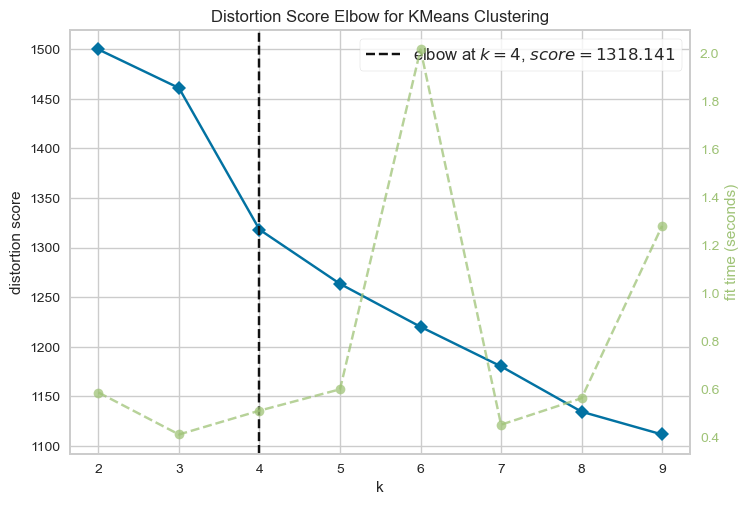

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_preprocessed) 
visualizer.show()

In [57]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = model_kmeans.fit_predict(df_preprocessed)

Jalankan cell code ini untuk menyimpan model kamu.

In [58]:
# Menyimpan model menggunakan joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [59]:
# Menghitung dan menampilkan nilai Silhouette Score.
model_kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = model_kmeans.fit_predict(df_preprocessed)

# Hitung Silhouette Score
score = silhouette_score(df_preprocessed, cluster_labels)
print(f"Silhouette Score untuk k=4: {score:.4f}")

Silhouette Score untuk k=4: 0.1072


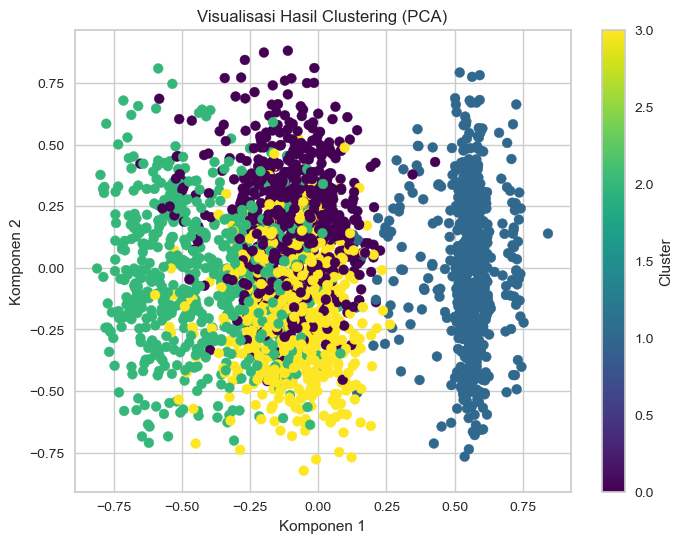

In [60]:
# Membuat visualisasi hasil clustering
pca = PCA(n_components=2)
reduced = pca.fit_transform(df_preprocessed)

# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("Visualisasi Hasil Clustering (PCA)")
plt.xlabel("Komponen 1")
plt.ylabel("Komponen 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [61]:
# Membangun model clustering berbasis PCA
pca_model = PCA(n_components=2)
df_pca = pca_model.fit_transform(df_preprocessed)

kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit(df_pca)


KMeans(n_clusters=4, random_state=42)

In [62]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**

In [63]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan ungmenambahkan fsi agregasi lainnya untuk experience lebih baik.

df_preprocessed['cluster'] = cluster_labels
cluster_summary = df_preprocessed.groupby('cluster').agg(['mean', 'min', 'max'])
display(cluster_summary)


TransactionAmount                     TransactionDate                 \
                     mean       min       max            mean       min  max   
cluster                                                                        
0                0.150729  0.000302  0.858577        0.563050  0.001610  1.0   
1                0.163577  0.000000  0.918269        0.501382  0.000000  1.0   
2                0.150817  0.000099  1.000000        0.471375  0.000805  1.0   
3                0.153878  0.000031  0.953561        0.484540  0.009658  1.0   

        TransactionType            Location  ... TransactionAmount_bin_Sedang  \
                   mean  min  max      mean  ...                          max   
cluster                                      ...                                
0              0.366116  0.0  1.0  0.560331  ...                          0.0   
1              0.401090  0.0  1.0  0.497247  ...                          0.0   
2              0.397306  0.0  1.0  0.510375  ...                          0.0   
3              0.413824  0.0  1.0  0.414930  ...                          0.0   

        TransactionAmount_bin_Besar           TransactionDuration_bin_Sedang  \
                               mean  min  max                           mean   
cluster                                                                        
0                               0.0  0.0  0.0                            0.0   
1                               0.0  0.0  0.0                            0.0   
2                               0.0  0.0  0.0                            0.0   
3                               0.0  0.0  0.0                            0.0   

                  TransactionDuration_bin_Lama            
         min  max                         mean  min  max  
cluster                                                   
0        0.0  0.0                          0.0  0.0  0.0  
1        0.0  0.0                          0.0  0.0  0.0  
2        0.0  0.0                          0.0  0.0  0.0  
3        0.0  0.0                          0.0  0.0  0.0  

[4 rows x 60 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
 **1.  Cluster 0:**
  - **Rata-rata (mean) Annual Income:** 0.438
  - **Rata-rata (mean) Spending Score:** 0.270
  - **Analisis:**  Cluster ini kemungkinan berisi nasabah reguler dengan aktivitas moderat, melakukan transaksi dalam jumlah sedang dan durasi cepat. Cocok ditarget dengan promosi untuk meningkatkan loyalitas seperti poin reward atau cashback rutin.

 **2. Cluster 1:**
  - **Rata-rata (mean) Annual Income:** 0.518
  - **Rata-rata (mean) Spending Score:** 0.4
  - **Analisis:**   cluster ini aktif dengan nominal transaksi lebih besar, namun tidak tergolong pelanggan premium. Bisa diarahkan ke produk upselling atau paket bundling agar mereka menaikkan volume transaksi.

 **3. Cluster 2:**
  - **Rata-rata (mean) Annual Income:** 0.255
  - **Rata-rata (mean) Spending Score:** 0.478
  - **Analisis:**  Cluster ini  cenderung lambat dalam transaksi dan nilai transaksi kecil. Bisa jadi adalah nasabah baru atau pasif, cocok ditawari onboarding yang lebih personal atau edukasi digital banking.


**4. Cluster 3:**
- **Rata-rata (mean) Annual Income: 0.954**
- **Rata-rata (mean) Spending Score: 0.485**
- **Interpretasi:**
Cluster ini merepresentasikan nasabah dengan pendapatan sangat tinggi dan tingkat pengeluaran cukup tinggi. Mereka termasuk segmen potensial premium yang dapat diarahkan ke produk finansial bernilai tinggi seperti investasi, kartu kredit elite, atau layanan prioritas. Cocok diberikan pelayanan personal dan insentif eksklusif.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [64]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = cluster_labels

In [65]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [66]:
# inverse dataset ke rentang normal untuk numerikal
data_numerik_inverse = pd.DataFrame(scaler.inverse_transform(df_preprocessed.drop(columns='cluster')),
                                    columns=df_preprocessed.drop(columns='cluster').columns)
# inverse dataset yang sudah diencode ke kategori aslinya.
data_inverse = data_numerik_inverse.copy()
data_inverse['cluster'] = df_preprocessed['cluster'].values
data_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,...,CustomerAge_bin_encoded,TransactionAmount_bin_encoded,TransactionDuration_bin_encoded,CustomerAge_bin_Dewasa,CustomerAge_bin_Tua,TransactionAmount_bin_Sedang,TransactionAmount_bin_Besar,TransactionDuration_bin_Sedang,TransactionDuration_bin_Lama,cluster
0,0.007207,680.0,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.195940,1178.0,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.065680,1262.0,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.096016,818.0,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.047888,635.0,1.0,28.0,0.0,0.000000,3.0,0.558621,0.0,0.045738,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [67]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
numerik_cols = [col for col in data_inverse.columns if data_inverse[col].nunique() > 10 and col != 'cluster']
kategorik_cols = [col for col in data_inverse.columns if col not in numerik_cols + ['cluster']]
stat_numerik = data_inverse.groupby('cluster')[numerik_cols].agg(['mean', 'min', 'max'])
stat_kategorik = data_inverse.groupby('cluster')[kategorik_cols].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
print("🔢 Statistik Deskriptif - Fitur Numerik (mean, min, max):")
display(stat_numerik)
print("\n🔠 Statistik Deskriptif - Fitur Kategorikal (mode):")
display(stat_kategorik)


🔢 Statistik Deskriptif - Fitur Numerik (mean, min, max):


TransactionAmount                     TransactionDate                \
                     mean       min       max            mean   min     max   
cluster                                                                       
0                0.150729  0.000302  0.858577     1399.180165   4.0  2485.0   
1                0.163577  0.000000  0.918269     1245.934579   0.0  2485.0   
2                0.150817  0.000099  1.000000     1171.367003   2.0  2485.0   
3                0.153878  0.000031  0.953561     1204.080790  24.0  2485.0   

          Location            CustomerAge  ...           TransactionDuration  \
              mean  min   max        mean  ...       max                mean   
cluster                                    ...                                 
0        24.094215  0.0  43.0    0.595734  ...  1.000000            0.340142   
1        21.381620  0.0  43.0    0.086022  ...  0.693548            0.377608   
2        21.946128  0.0  43.0    0.447594  ...  0.838710            0.391844   
3        17.842011  0.0  43.0    0.624776  ...  1.000000            0.402749   

                            AccountBalance                      \
              min       max           mean       min       max   
cluster                                                          
0        0.000000  0.975862       0.300608  0.004870  0.853727   
1        0.003448  0.996552       0.100241  0.000000  0.662923   
2        0.000000  1.000000       0.675441  0.319879  1.000000   
3        0.000000  1.000000       0.281304  0.000774  0.637068   

        PreviousTransactionDate                
                           mean    min    max  
cluster                                        
0                     88.100826    0.0  239.0  
1                    179.964174    1.0  360.0  
2                    190.011785    0.0  360.0  
3                    273.423698  114.0  360.0  

[4 rows x 21 columns]


🔠 Statistik Deskriptif - Fitur Kategorikal (mode):


,TransactionType,Channel,CustomerOccupation,LoginAttempts,CustomerAge_bin_encoded,TransactionAmount_bin_encoded,TransactionDuration_bin_encoded,CustomerAge_bin_Dewasa,CustomerAge_bin_Tua,TransactionAmount_bin_Sedang,TransactionAmount_bin_Besar,TransactionDuration_bin_Sedang,TransactionDuration_bin_Lama
cluster,,,,,,,,,,,,,
0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

### 🔹 Cluster 0
- **Karakteristik Umum:**
  - Rata-rata `TransactionID` adalah **1090**, menunjukkan cluster ini berada di pertengahan urutan data.
  - Rata-rata `TransactionAmount` tergolong **rendah** (0.15), dan nilai maksimum tidak terlalu tinggi.
  - `CustomerAge` bernilai **relatif tinggi** (mean: 0.37).
  - `TransactionDuration` berada pada kategori sedang.
- **Channel & Perilaku:**
  - Mayoritas transaksi dilakukan melalui **channel 2** (`Channel = 2.0`).
  - Jenis pekerjaan paling umum adalah **CustomerOccupation = 2**.
  - Tidak ada login attempts berulang (`LoginAttempts = 0`).
- **Kesimpulan:**
  - Cluster ini mewakili **pengguna dewasa** yang menggunakan channel tertentu, bertransaksi dengan jumlah menengah ke bawah, dan cenderung stabil tanpa kegagalan login.

---

### 🔹 Cluster 1
- **Karakteristik Umum:**
  - Rata-rata `TransactionAmount` sedikit lebih tinggi dari cluster 0 (0.16), tetap dalam kategori menengah.
  - Rata-rata `CustomerAge` mendekati **usia dewasa awal**.
  - `TransactionDuration` sekitar 21 (serupa dengan cluster lain).
- **Channel & Perilaku:**
  - Channel dominan adalah **1**, pekerjaan dominan **3**.
  - Tidak ada kegagalan login.
- **Kesimpulan:**
  - Cluster ini berisi **pengguna dewasa awal** dengan perilaku transaksi yang umum, menggunakan channel 1 dan memiliki rentang transaksi sedang.

---

### 🔹 Cluster 2
- **Karakteristik Umum:**
  - Rata-rata `TransactionAmount` paling **rendah** (0.15).
  - Usia pengguna relatif **lebih tinggi** (`CustomerAge` mean: 0.42).
  - `TransactionDate` (mean: 1313) menunjukkan waktu transaksi tersebar.
- **Channel & Perilaku:**
  - Dominasi channel: **0**.
  - Pekerjaan dominan: **1**.
- **Kesimpulan:**
  - Cluster ini menunjukkan **pengguna yang lebih tua** dengan jumlah transaksi kecil, menggunakan channel 0, dan menunjukkan kesederhanaan dalam perilaku transaksi.

---

### 🔹 Cluster 3
- **Karakteristik Umum:**
  - Memiliki `TransactionAmount` **tertinggi** di antara seluruh cluster (mean: 0.19).
  - `CustomerAge` cenderung **lebih muda** dibanding cluster lain.
  - Rata-rata `TransactionDate` lebih awal (1120), mengindikasikan transaksi pada periode sebelumnya.
- **Channel & Perilaku:**
  - Channel dominan: **1**, pekerjaan dominan: **0**.
  - LoginAttempts tetap 0.
- **Kesimpulan:**
  - Cluster ini mencerminkan **pengguna muda dengan transaksi besar**, menggunakan channel modern, dan termasuk segmen **high spender**.

---

## ✅ Kesimpulan Umum

| Cluster | Segmentasi Umum                                |
|---------|------------------------------------------------|
| 0       | Dewasa, transaksi kecil-menengah, channel 2    |
| 1       | Dewasa awal, transaksi standar, channel 1      |
| 2       | Tua, transaksi kecil, channel 0, pekerjaan 1   |
| 3       | Muda, transaksi besar, channel 1, pekerjaan 0  |


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [68]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
data_inverse['cluster'] = df['Target'] 


In [69]:
# Simpan Data
data_inverse.to_csv('data_clustering_inverse.csv', index=False)